# 第二次pj报告



## 第一部分 频率直方图和箱线图的绘制

In [3]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
import statsmodels.api as sm  
import scipy.stats as stats
from IPython.display import Image
from scipy.stats import skew,kurtosis
plt.rcParams['font.sans-serif'] = ['SimHei'] # 使其表格能正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 解决负号现实问题

# 读取数据  
data = pd.read_excel('fetal_weight_data.xlsx') #此处将胎重数据文件名改为了fetal_weight_data 

# 查看数据前几行  
print(data.head())

   出生体重  BPD(双顶径)  HC(头围)  AC(腹围)  FL(股骨长度)
0  3115       9.3    32.2    32.2       7.3
1  3220       9.9    33.0    33.0       7.1
2  2800       9.3    32.1    32.1       6.7
3  2870       9.0    31.2    31.2       6.4
4  3420       9.9    32.0    32.2       7.2


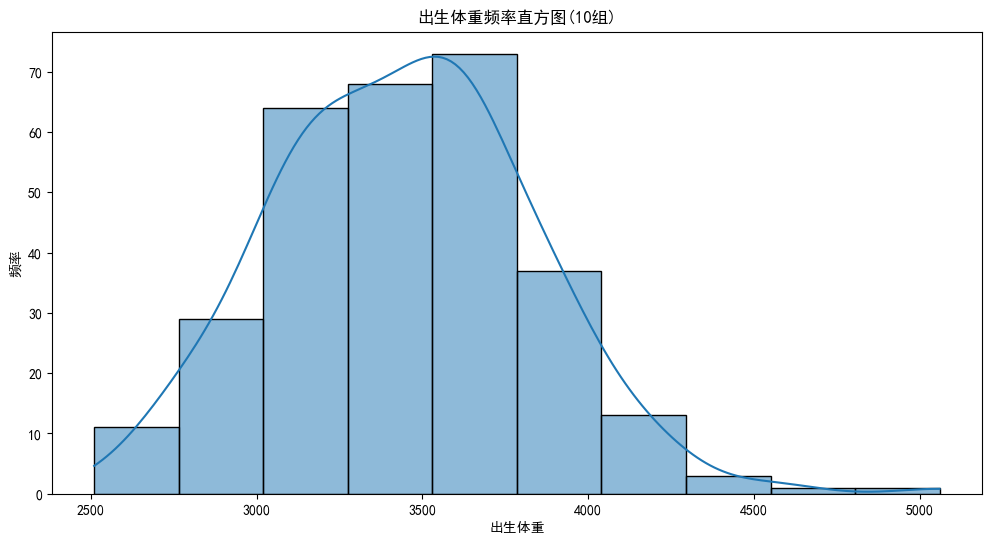

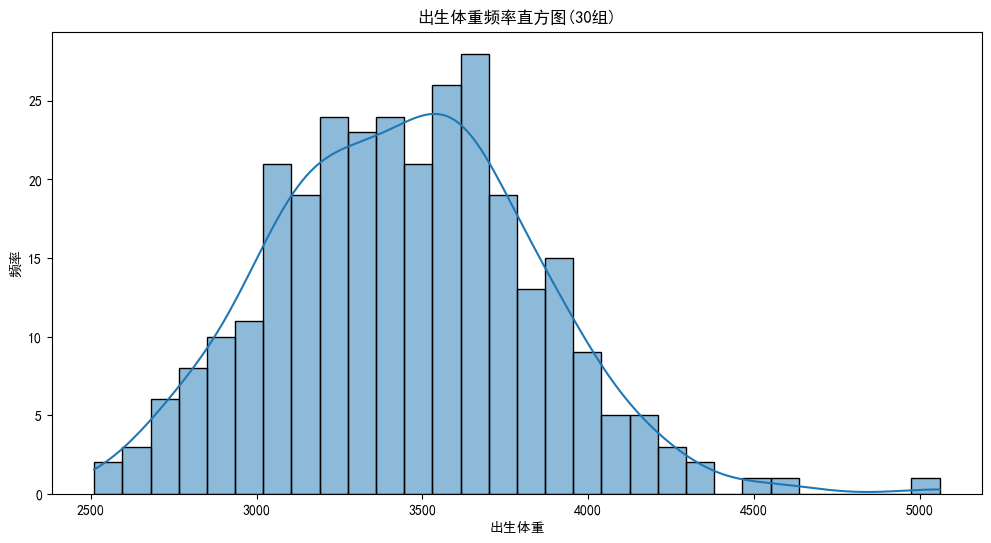

（1）均值： 3443.9133333333334
（2）中位数： 3440.0
（3）极差： 2550
（4）标准差： 390.83473807849896
（5）方差： 152751.7924888889
（6）偏度： 0.2905862219638874
（7）峰度： 0.43713367012594295


In [4]:
# 绘制频率直方图  
plt.figure(figsize=(12, 6))  
sns.histplot(data['出生体重'], bins=10, kde=True)  
plt.title('出生体重频率直方图(10组)')  
plt.xlabel('出生体重')  
plt.ylabel('频率')  
plt.show()

plt.figure(figsize=(12, 6))  
sns.histplot(data['出生体重'], bins=30, kde=True)  
plt.title('出生体重频率直方图(30组)')  
plt.xlabel('出生体重')  
plt.ylabel('频率')  
plt.show()
y=data['出生体重']
print("（1）均值：", np.mean(y))
print("（2）中位数：", np.median(y))
print("（3）极差：", np.ptp(y))
print("（4）标准差：", np.std(y))
print("（5）方差：", np.var(y))
print("（6）偏度：", skew(y))
print("（7）峰度：", kurtosis(y))

#### 频率分布图如上，第一张图划分为10组，第二张图划分为30组，同时根据胎儿出生体重数据可知其均值、中位数、极差等数据如上

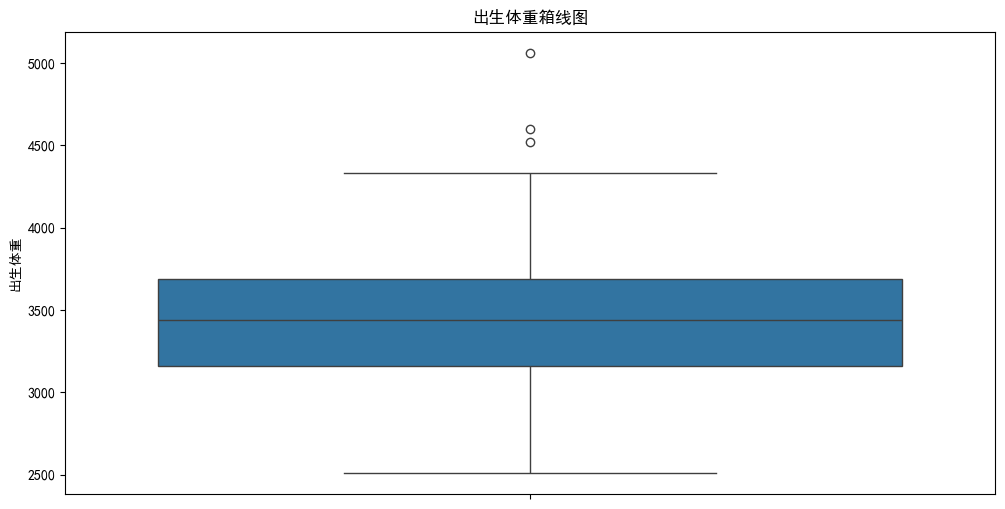

（1）平均数： 3443.9133333333334
（2）中位数： 3440.0
（3）第三四分位数（上四分位数）： 3690.5
（4）第一四分位数（下四分位数）： 3158.75
（5）四分位数间距（IQR）: 531.75
（6）上边缘： 4335
（7）up（Q3+1.5IQR）: 4488.125
（8）down（Q1-1.5IQR）: 2361.125
（9）下边缘： 2510
（10）异常值有： [4520 4600 5060]


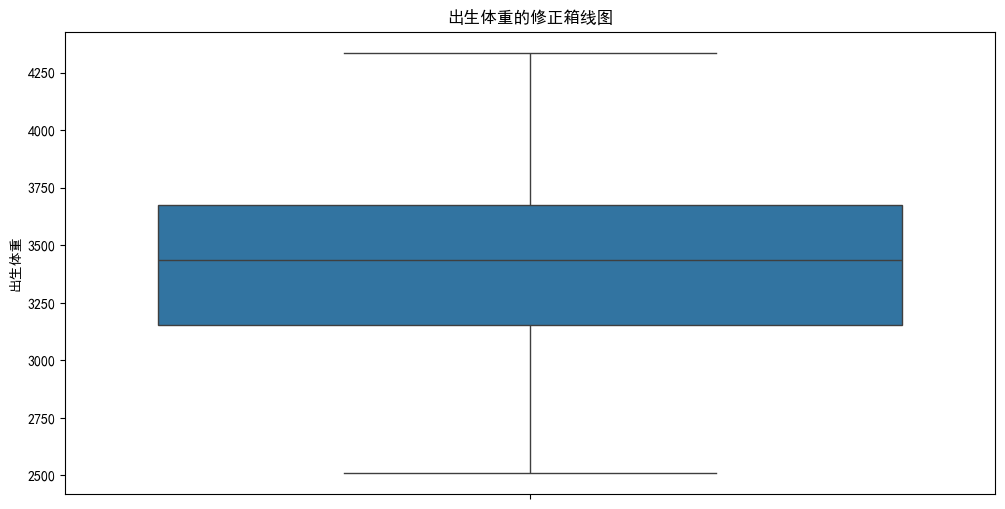

In [6]:
# 绘制箱线图  
plt.figure(figsize=(12, 6))  
sns.boxplot(y=data['出生体重'])
plt.title('出生体重箱线图')  
plt.ylabel('出生体重')  
plt.show()

y=data['出生体重']

a = np.quantile(y, 0.75)  # 上四分之一数
b = np.quantile(y, 0.25)  # 下四分之一数
print("（1）平均数：", np.mean(y))  # 打印均值
print("（2）中位数：", np.median(y))  # 打印中位数
print("（3）第三四分位数（上四分位数）：", a)  # 打印上四分位数
print("（4）第一四分位数（下四分位数）：", b)  # 打印下四分位数
print("（5）四分位数间距（IQR）:", a-b)
up_limit = a + 1.5 * (a - b)  # 异常值判断标准
low_limit = b - 1.5 * (a - b)  # 异常值判断标准
y = np.sort(y)  # 对原始数据排序
shangjie = y[y < up_limit][-1]  # 除了异常值外的最大值
xiajie = y[y > low_limit][0]  # 除了异常值外的最小值
print("（6）上边缘：", shangjie)  # 打印上界
print("（7）up（Q3+1.5IQR）:", up_limit)
print("（8）down（Q1-1.5IQR）:", low_limit)
print("（9）下边缘：", xiajie)  # 打印下界
print('（10）异常值有：',y[(y < low_limit) + (y > up_limit)])

data_cleaned = data[(data['出生体重'] >= low_limit) & (data['出生体重'] <= up_limit)]
plt.figure(figsize=(12, 6))
sns.boxplot(y=data_cleaned['出生体重'])
plt.title('出生体重的修正箱线图')
plt.show()

#### 胎儿的出生体重中位数为3440.0，下四分位数为3158.75，上四分位数为3690.5,上边缘为4335，下边缘为2510，异常值包括4520,4600,5060，各数据如上，同时剔除异常值后画出修正箱线图

## 第二部分 划分为训练集和测试集并进行线型回归拟合

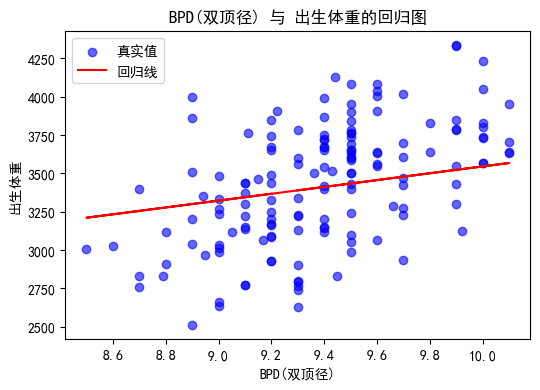

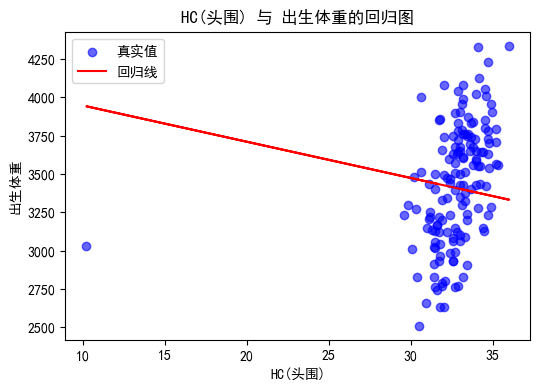

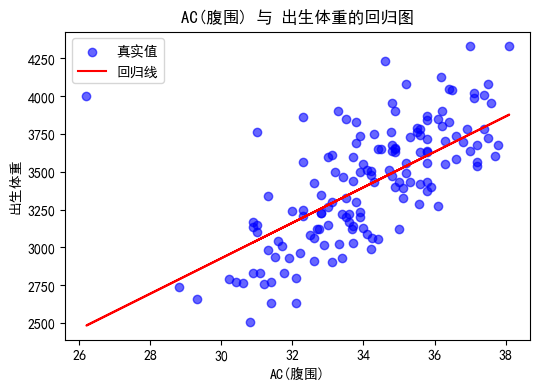

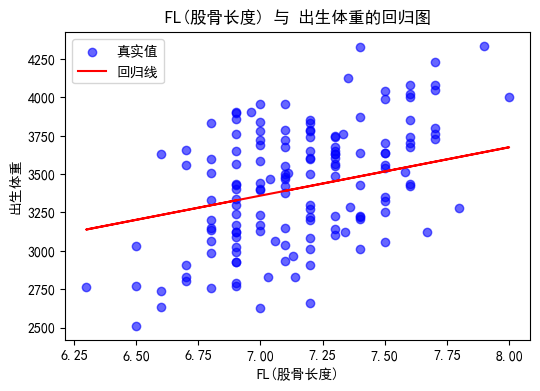

回归系数: [223.04912922 -23.60198959 117.13927861 315.32509975]
截距: -4164.297946676423


In [9]:
# 划分训练集和测试集  
X = data[['BPD(双顶径)', 'HC(头围)', 'AC(腹围)', 'FL(股骨长度)']]  # 参数数据  
y = data['出生体重'] # X = data[['BPD(双顶径)', 'HC(头围)', 'AC(腹围)', 'FL(股骨长度)']]

# 使用50%作为训练集，50%作为测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) 
# 线性回归拟合  
model = LinearRegression()  
model.fit(X_train, y_train)  

# 预测  
y_pred = model.predict(X_test)



# 遍历每个特征，绘制散点图和回归线
for i, feature in enumerate(X.columns):
    plt.figure(figsize=(6, 4))
    
    # 使用测试集中特定特征计算预测值
    X_feature_test = X_test[feature].values.reshape(-1, 1)
    y_feature_pred = model.predict(X_test.assign(**{col: np.mean(X_test[col]) for col in X.columns if col != feature}))
    
    # 绘制散点图
    plt.scatter(X_test[feature], y_test, color="blue", alpha=0.6, label="真实值")
    
    # 绘制回归线
    plt.plot(X_test[feature], y_feature_pred, color="red", label="回归线")
    
    plt.xlabel(feature)
    plt.ylabel("出生体重")
    plt.title(f"{feature} 与 出生体重的回归图")
    plt.legend()
    plt.show()



# 返回系数和截距  
print("回归系数:", model.coef_)  
print("截距:", model.intercept_)

#### 利用训练集参数对胎重进行线性回归拟合后得到

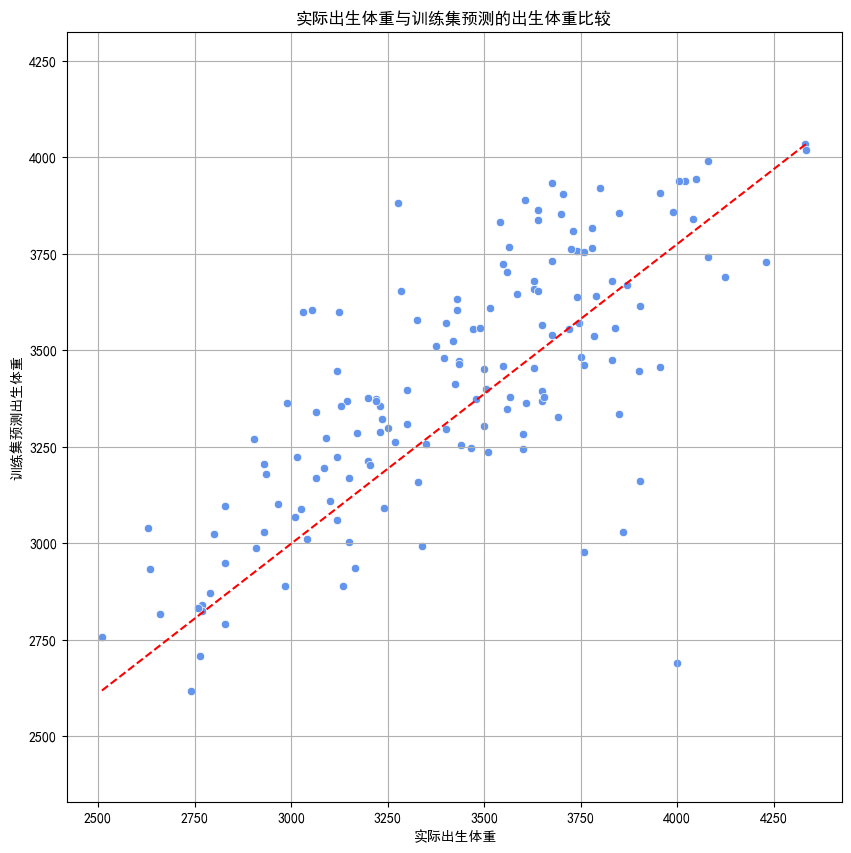

In [11]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# 创建一个散点图，展示实际出生体重与模型预测值  
plt.figure(figsize=(10, 10))  
sns.scatterplot(x=y_test, y=y_pred,color='cornflowerblue')  
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--')  
plt.title('实际出生体重与训练集预测的出生体重比较')  
plt.xlabel('实际出生体重')  
plt.ylabel('训练集预测出生体重')  
plt.axis('equal')  # 使x轴和y轴比例一致  
plt.grid()  
plt.show()

## 第三部分 新方程的皮尔逊相关系数、MPE、MAPE分析和Hadlock4预测及其MPE、MAPE

![皮尔逊](./皮尔逊.png)

In [14]:
import numpy as np  

# 计算MPE和MAPE  
mpe = np.mean((y_pred - y_test) / y_test) * 100  
mape = np.mean(np.abs(y_pred - y_test) / y_test) * 100  

# 计算Pearson相关系数  
pearson_r = np.corrcoef(y_pred, y_test)[0, 1]  

# 输出结果  
print(f'MPE（Mean Percentage Error 平均百分比误差）: {mpe:.4f}%')  
print(f'MAPE（Mean Absolute Percentage Error 平均绝对百分比误差）: {mape:.4f}%')  
print(f'Pearson correlation coefficient (R，皮尔逊相关系数): {pearson_r:.4f}')

MPE（Mean Percentage Error 平均百分比误差）: -0.1388%
MAPE（Mean Absolute Percentage Error 平均绝对百分比误差）: 5.7258%
Pearson correlation coefficient (R，皮尔逊相关系数): 0.7351


#### MPE为负值，表示预测值整体低于实际值，MPE越接近于0，说明模型的预测偏差越小

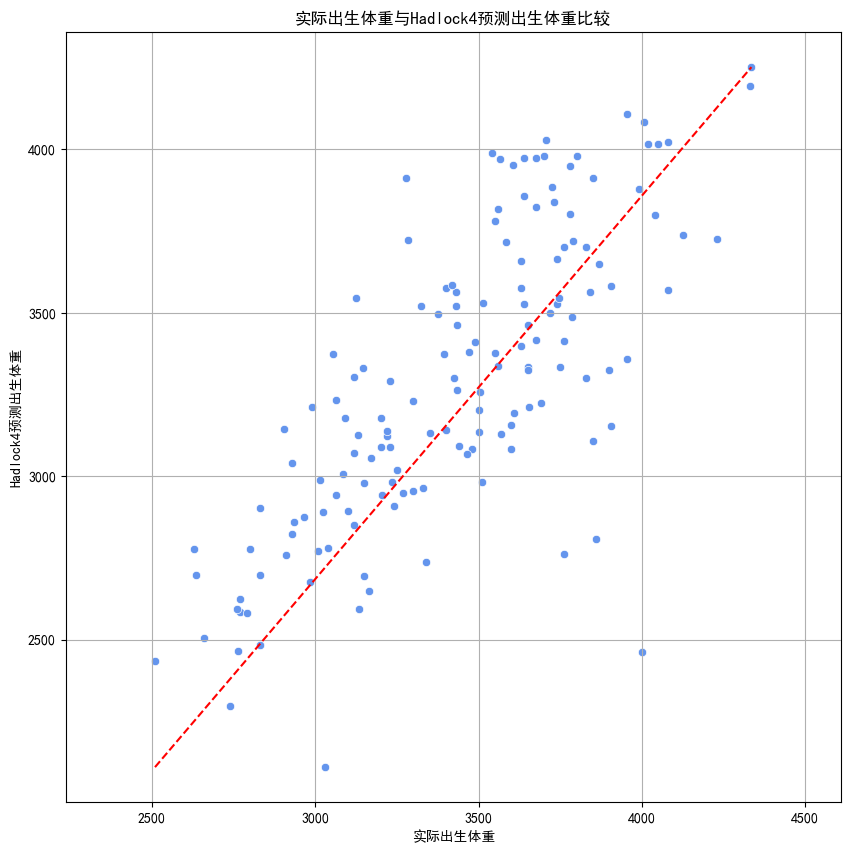

Hadlock MPE（Mean Percentage Error 平均百分比误差）: -4.0545%
Hadlock MAPE（Mean Absolute Percentage Error 平均绝对百分比误差）: 7.4641%
Pearson correlation coefficient (R，皮尔逊相关系数): 0.7442
F值（F-statistic）: 7.07, p值（P-value）: 0.0083


In [16]:
hadlock_pred = (10**(1.3596 - 0.00386 * X_test['AC(腹围)'] * X_test['FL(股骨长度)'] +   
                     0.0064 * X_test['HC(头围)'] +   
                     0.00061 * X_test['BPD(双顶径)']* X_test['AC(腹围)'] +
                     0.0424* X_test['AC(腹围)'] + 
                     0.174* X_test['FL(股骨长度)']))  

X = data[['BPD(双顶径)', 'HC(头围)', 'AC(腹围)', 'FL(股骨长度)']]  # 参数数据  
y = data['出生体重']  

# 使用50%作为训练集，50%作为测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)  
plt.figure(figsize=(10, 10))  
sns.scatterplot(x=y_test, y=hadlock_pred,color='cornflowerblue')  
plt.plot([y_test.min(), y_test.max()], [hadlock_pred.min(), hadlock_pred.max()], color='red', linestyle='--')  
plt.title('实际出生体重与Hadlock4预测出生体重比较')  
plt.xlabel('实际出生体重')  
plt.ylabel('Hadlock4预测出生体重')  
plt.axis('equal')  # 使x轴和y轴比例一致  
plt.grid()  
plt.show()


# 计算Hadlock方程的MPE和MAPE  
mpe_hadlock = np.mean((hadlock_pred - y_test) / y_test) * 100  
mape_hadlock = np.mean(np.abs(hadlock_pred - y_test) / y_test) * 100  

# 输出Hadlock的指标  
print(f'Hadlock MPE（Mean Percentage Error 平均百分比误差）: {mpe_hadlock:.4f}%')  
print(f'Hadlock MAPE（Mean Absolute Percentage Error 平均绝对百分比误差）: {mape_hadlock:.4f}%')  
#计算并输出Hadlock的Pearson相关系数
pearson_r = np.corrcoef(hadlock_pred, y_test)[0, 1]
print(f'Pearson correlation coefficient (R，皮尔逊相关系数): {pearson_r:.4f}')
# 进行方差分析  
f_value, p_value = stats.f_oneway(y_pred, hadlock_pred)  
print(f"F值（F-statistic）: {f_value:.2f}, p值（P-value）: {p_value:.4f}")

#### （1）新方程的MPE、MAPE分别为-0.1388%， 5.7258；Hadlock的MPE、MAPE分别为 -4.0545%， 7.4641
#### （2）MPE为负值，表示Hadlock的预测值整体低于实际值，同时Hadlock模型的MPE较训练集预测远离0，所以Hadlock模型的预测偏差更大
#### （3）训练集模型的皮尔逊相关系数为0.7351，Hadlock模型的皮尔逊相关系数为0.7441，说明后者的相关性略好于前者
#### （4）两者的皮尔逊相关系数均在0.6-0.8之间，表现为强相关
#### （5）训练集模型的 MAPE 明显较小于模型 B，但两者的皮尔逊相关系数相近，所以优先训练集模型。

##### （1）零假设（H0）：训练集模型和Hadlock4方程的预测结果在均值上没有显著差异。
##### （2）由于 p 值为0.0083，小于 0.05，所以可以拒绝零假设，认为新方程和Hadlock4方程的预测结果有显著差异。
##### （3）F 值：F 值衡量模型解释的方差与误差方差的比率。公式：𝐹=模型解释的均方差/模型未解释的均方差,模型解释的均方差（MSR）：回归平方和（SSR）除以模型自由度。模型未解释的均方差（MSE）：残差平方和（SSE）除以残差自由度。解读：较大的 F 值表明模型可以更显著地解释数据中的变化。


## 第四部分 K折交叉验证
K折交叉验证：用于模型的鲁棒性测试，通过将数据分为K个子集，以不同的训练-测试集组合多次训练模型，最终得到模型性能的平均得分。

In [20]:
from sklearn.model_selection import cross_val_score  

# 创建模型  
model = LinearRegression()  

# 使用K折交叉验证  
cv_scores = cross_val_score(model, X, y, cv=10)  

print(f'K折交叉验证得分: {cv_scores}')  
print(f'平均得分: {np.mean(cv_scores):.8f}')

K折交叉验证得分: [0.67238772 0.74711468 0.68614961 0.3327542  0.72252574 0.18212485
 0.48599352 0.49406052 0.40983628 0.50805257]
平均得分: 0.52409997


#### （1）观察得分分布：最高分：0.7471，最低分：0.1821，得分波动较大，从 0.1821到 0.7471，说明模型在不同折上的表现差异明显。某些折的验证得分（如 0.1821 和 0.3328）显著偏低，可能表明数据分布不均或模型对部分子集的适应性较差。
#### （2）由于是回归任务，该模型只能解释约 52.4% 的数据变异，表现较弱。

## 第五部分 扩展分析

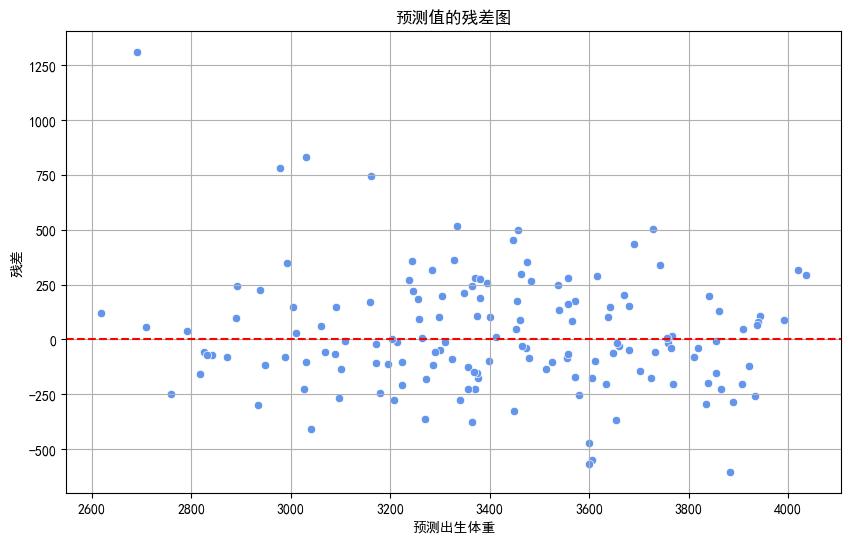

In [23]:
# 计算残差  
residuals = y_test - y_pred  

# 创建残差图  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=y_pred, y=residuals,color='cornflowerblue')  
plt.axhline(0, color='red', linestyle='--')  
plt.title('预测值的残差图')  
plt.xlabel('预测出生体重')  
plt.ylabel('残差')  
plt.grid()  
plt.show()

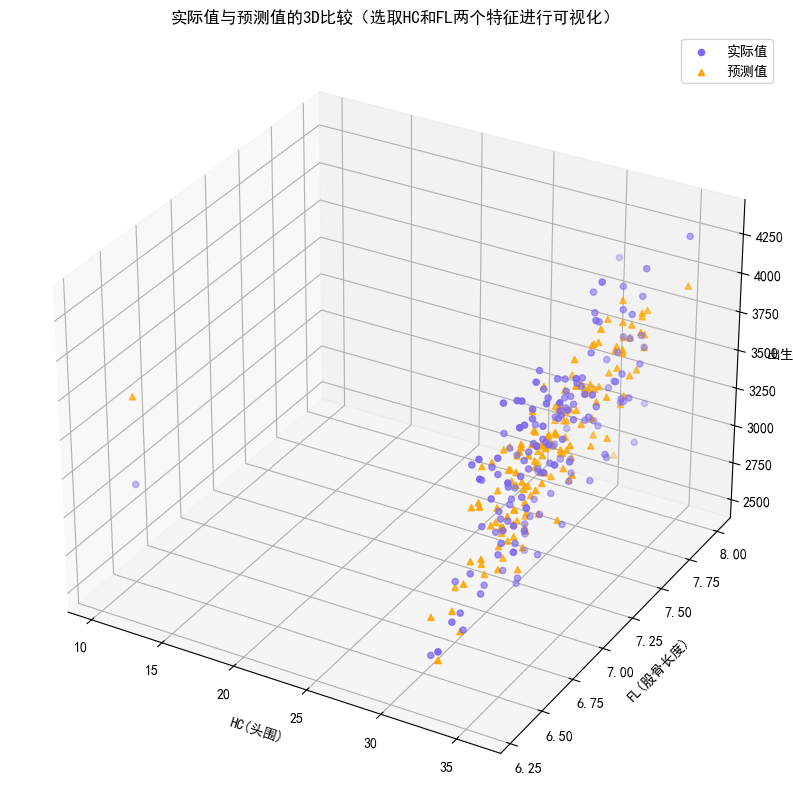

In [24]:
from mpl_toolkits.mplot3d import Axes3D  

# 创建3D图  
fig = plt.figure(figsize=(15, 10))  
ax = fig.add_subplot(111, projection='3d')  

# 选取两个特征进行可视化（例如HC和FL）  
ax.scatter(X_test['HC(头围)'], X_test['FL(股骨长度)'], y_test, c='mediumslateblue', label='实际值')  
ax.scatter(X_test['HC(头围)'], X_test['FL(股骨长度)'], y_pred, c='orange', marker='^', label='预测值')  

ax.set_title('实际值与预测值的3D比较（选取HC和FL两个特征进行可视化）')  
ax.set_xlabel('HC(头围)')  
ax.set_ylabel('FL(股骨长度)')  
ax.set_zlabel('出生体重')  
plt.legend()  
plt.show()

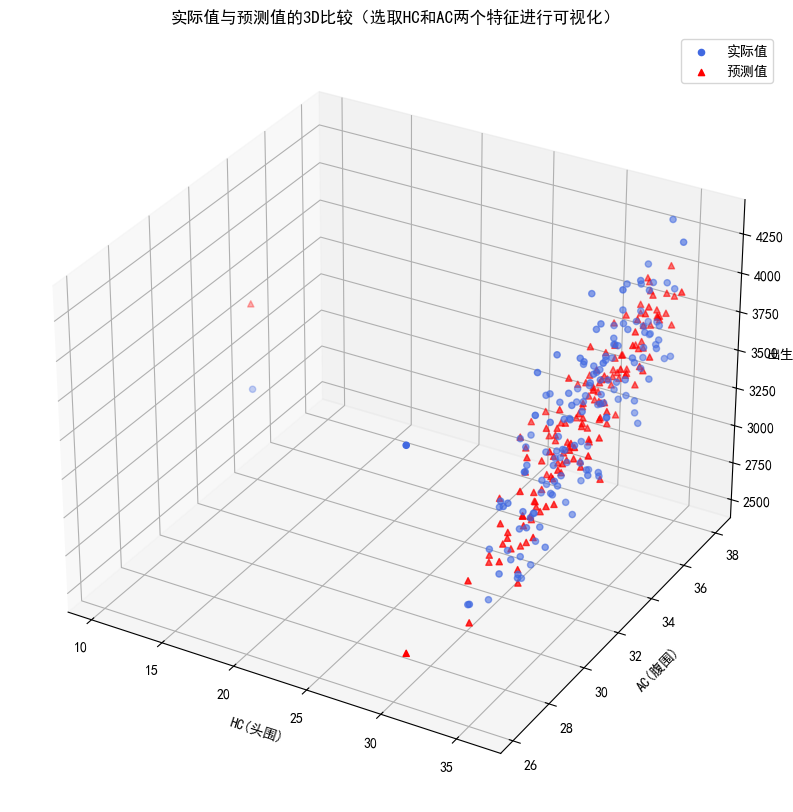

In [25]:
from mpl_toolkits.mplot3d import Axes3D  

# 创建3D图  
fig = plt.figure(figsize=(15, 10))  
ax = fig.add_subplot(111, projection='3d')  

# 选取两个特征进行可视化（例如HC(头围)和AC）  
ax.scatter(X_test['HC(头围)'], X_test['AC(腹围)'], y_test, c='royalblue', label='实际值')  
ax.scatter(X_test['HC(头围)'], X_test['AC(腹围)'], y_pred, c='r', marker='^', label='预测值')  

ax.set_title('实际值与预测值的3D比较（选取HC和AC两个特征进行可视化）')  
ax.set_xlabel('HC(头围)')  
ax.set_ylabel('AC(腹围)')  
ax.set_zlabel('出生体重')  
plt.legend()  
plt.show()